In [91]:
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
# %matplotlib

In [92]:
import os
import sys
os.getcwd()

'/home/pilab/workspace/Resting'

In [93]:
verity_col = ['time', 'idx', 'sensor1', 'sensor2', 'sensor3', 'sensor4']
h10_col = ['time', 'idx', 'sensor']

resting_verity = pd.read_csv("(H)_000_20230408_181522_Verity.csv", names = verity_col)
resting_h10 = pd.read_csv("(H)_000_20230408_181522_H10.csv", names = h10_col)

In [94]:
print('H10 모양 :', resting_h10.shape)
print('verity 모양 :', resting_verity.shape)

H10 모양 : (62707, 3)
verity 모양 : (2536, 6)


In [95]:
time_format = "%Y%m%d%H%M%S%f"
resting_verity['times'] = pd.to_datetime(resting_verity['time'], format = time_format)
zero_list = [0]
resting_verity['interval'] = zero_list + [resting_verity['times'].loc[i+1]-resting_verity['times'].loc[i] for i in range(len(resting_verity)-1)]
rver_start_time = resting_verity.iloc[0][-2]
rver_end_time = resting_verity.iloc[-1][-2]

print(resting_verity.head())
print(resting_verity.tail())
print('시작 시간:',rver_start_time)
print('종료 시간:',rver_end_time)
print('총 측정 시간:', rver_end_time-rver_start_time)
print('해상도:', (rver_end_time-rver_start_time)/ len(resting_verity))

                   time  idx  sensor1  sensor2  sensor3  sensor4   
0  20230408181522536247    0   105270   160199   266507  -184280  \
1  20230408181522554428    1   105412   160215   266648  -184150   
2  20230408181522572610    2   105432   160154   266915  -184581   
3  20230408181522590792    3   105653   160535   267410  -184931   
4  20230408181523410852    4   100947   153980   262669  -184279   

                       times                interval  
0 2023-04-08 18:15:22.536247                       0  
1 2023-04-08 18:15:22.554428  0 days 00:00:00.018181  
2 2023-04-08 18:15:22.572610  0 days 00:00:00.018182  
3 2023-04-08 18:15:22.590792  0 days 00:00:00.018182  
4 2023-04-08 18:15:23.410852  0 days 00:00:00.820060  
                      time   idx  sensor1  sensor2  sensor3  sensor4   
2531  20230408182323515667  2531   111124   167614   286462  -184728  \
2532  20230408182324777841  2532   107715   163499   278376  -184290   
2533  20230408182324796022  2533   107841   1

In [99]:
resting_h10['times'] = pd.to_datetime(resting_h10['time'], format = time_format)
zero_list = [0]
resting_h10['interval'] = zero_list + [resting_h10['times'].loc[i+1]-resting_h10['times'].loc[i] for i in range(len(resting_h10)-1)]
rh10_start_time = resting_h10.iloc[0][-2]
rh10_end_time = resting_h10.iloc[-1][-2]
h10_resolution = (rh10_end_time-rh10_start_time)/ len(resting_h10)

print(resting_h10.head())
print(resting_h10.tail())
print('시작 시간:',rh10_start_time)
print('종료 시간:',rh10_end_time)
print('총 측정 시간:', rh10_end_time-rh10_start_time)
print('해상도:', h10_resolution)
print(1/len(resting_h10))

                   time  idx  sensor                      times   
0  20230408181521977016    0     -36 2023-04-08 18:15:21.977016  \
1  20230408181521984708    1     -38 2023-04-08 18:15:21.984708   
2  20230408181521992400    2     -21 2023-04-08 18:15:21.992400   
3  20230408181522000093    3      -2 2023-04-08 18:15:22.000093   
4  20230408181522007785    4     -14 2023-04-08 18:15:22.007785   

                 interval  
0                       0  
1  0 days 00:00:00.007692  
2  0 days 00:00:00.007692  
3  0 days 00:00:00.007693  
4  0 days 00:00:00.007692  
                       time    idx  sensor                      times   
62702  20230408182324601322  62702    -171 2023-04-08 18:23:24.601322  \
62703  20230408182324609014  62703    -118 2023-04-08 18:23:24.609014   
62704  20230408182324616706  62704    -135 2023-04-08 18:23:24.616706   
62705  20230408182324624399  62705    -167 2023-04-08 18:23:24.624399   
62706  20230408182324632091  62706    -140 2023-04-08 18:23:24.6

In [100]:
pd.set_option('display.max_row', None)
pd.set_option('display.max_columns', None)
print(resting_h10['interval'])

0                               0
1          0 days 00:00:00.007692
2          0 days 00:00:00.007692
3          0 days 00:00:00.007693
4          0 days 00:00:00.007692
5          0 days 00:00:00.007692
6          0 days 00:00:00.007693
7          0 days 00:00:00.007692
8          0 days 00:00:00.007692
9          0 days 00:00:00.007693
10         0 days 00:00:00.007692
11         0 days 00:00:00.007692
12         0 days 00:00:00.007693
13         0 days 00:00:00.007692
14         0 days 00:00:00.007692
15         0 days 00:00:00.007692
16         0 days 00:00:00.007693
17         0 days 00:00:00.007692
18         0 days 00:00:00.007692
19         0 days 00:00:00.007693
20         0 days 00:00:00.007692
21         0 days 00:00:00.007692
22         0 days 00:00:00.007693
23         0 days 00:00:00.007692
24         0 days 00:00:00.007692
25         0 days 00:00:00.007693
26         0 days 00:00:00.007692
27         0 days 00:00:00.007692
28         0 days 00:00:00.007692
29         0 d

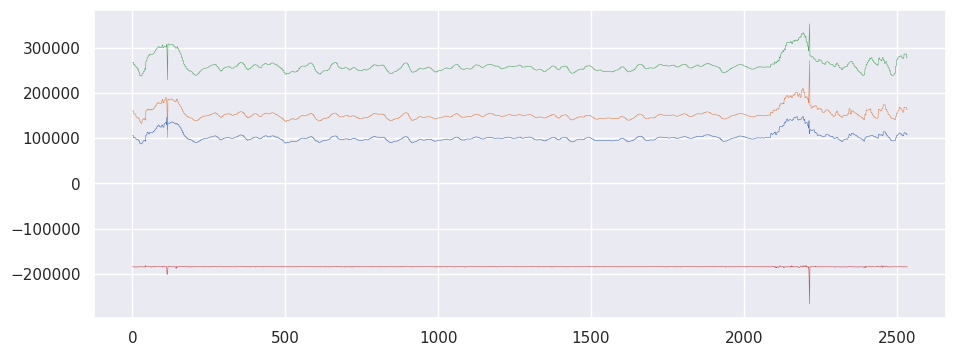

In [61]:
mplot = resting_verity['sensor1'].plot(linewidth = 0.4)
mplot = resting_verity['sensor2'].plot(linewidth = 0.4)
mplot = resting_verity['sensor3'].plot(linewidth = 0.4)
mplot = resting_verity['sensor4'].plot(linewidth = 0.4)

In [62]:
print('시작 오차:', rver_start_time-rh10_start_time)
print('종료 오차:', rver_end_time-rh10_end_time)

시작 오차: 0 days 00:00:00.559231
종료 오차: 0 days 00:00:00.200295


In [63]:
resting_h10 = resting_h10.set_index('times')
resting_verity = resting_verity.set_index('times')

In [64]:
sns.set(rc={'figure.figsize':(11, 4)})

In [65]:
mean_ver = resting_verity['sensor4'].mean()

resting_verity[resting_verity['sensor4']<= -190000] = mean_ver


In [66]:
resting_verity['sensor4'].min()

-187837.0

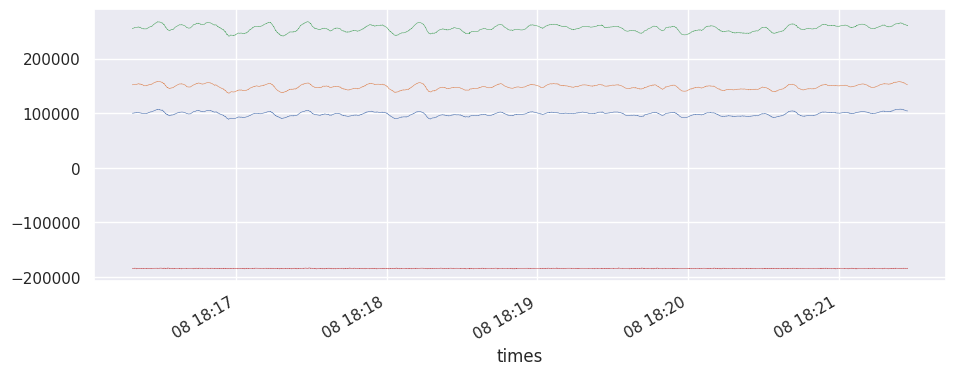

In [67]:
mplot = resting_verity['sensor1'][300:1900].plot(linewidth = 0.4)
mplot = resting_verity['sensor2'][300:1900].plot(linewidth = 0.4)
mplot = resting_verity['sensor3'][300:1900].plot(linewidth = 0.4)
mplot = resting_verity['sensor4'][300:1900].plot(linewidth = 0.4)

9140.206250000003


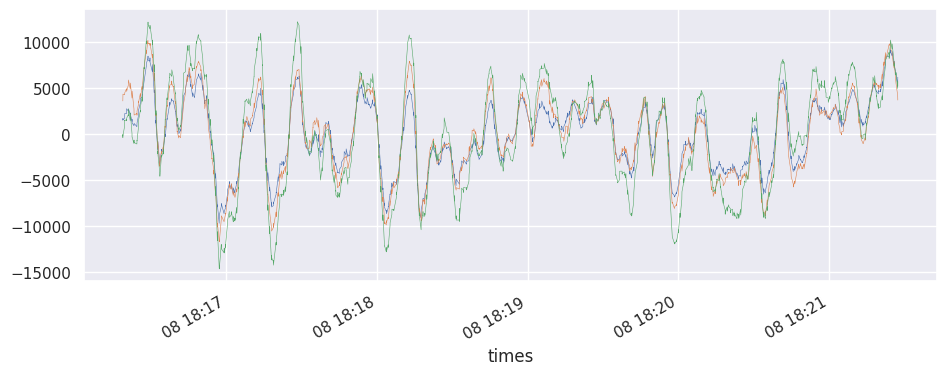

In [68]:
s1_mean = resting_verity['sensor1'][300:1900].mean()
s2_mean = resting_verity['sensor2'][300:1900].mean()
s3_mean = resting_verity['sensor3'][300:1900].mean()
s4_mean = resting_verity['sensor4'][300:1900].mean()

s1_balance = resting_verity['sensor1'][300:1900]-s1_mean
s2_balance = resting_verity['sensor2'][300:1900]-s2_mean
s3_balance = resting_verity['sensor3'][300:1900]-s3_mean
s4_balance = resting_verity['sensor4'][300:1900]-s4_mean


mplot = s1_balance.plot(linewidth = 0.4)
mplot = s2_balance.plot(linewidth = 0.4)
mplot = s3_balance.plot(linewidth = 0.4)
print(s1_balance.max())

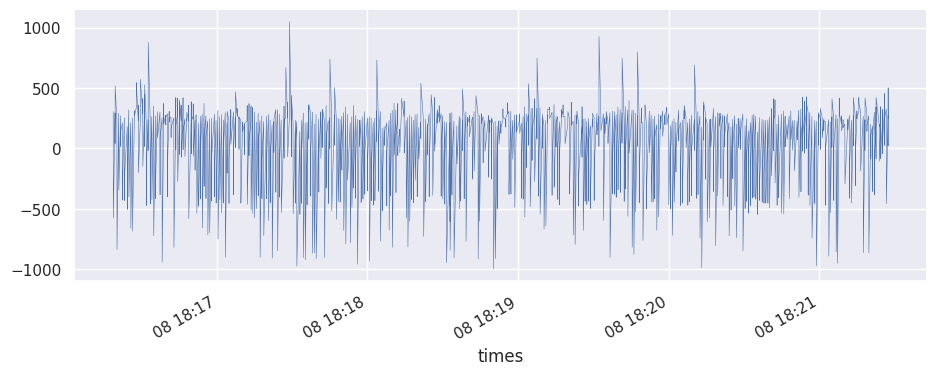

In [69]:
mplot = s4_balance.plot(linewidth = 0.4)

In [70]:
s1_spectrum = np.fft.rfft(s1_balance)
s2_spectrum = np.fft.rfft(s2_balance)
s3_spectrum = np.fft.rfft(s3_balance)
s4_spectrum = np.fft.rfft(s4_balance)

<StemContainer object of 3 artists>

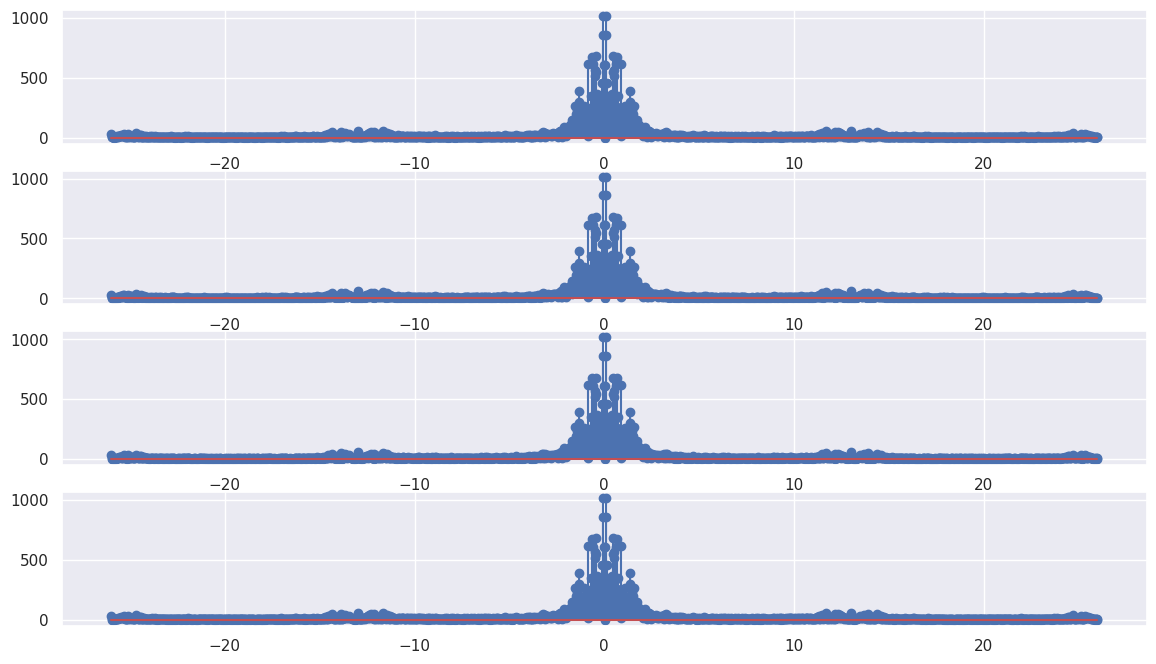

In [71]:
fs = 52
length = len(s1_balance)
f = np.linspace(-(fs / 2), fs / 2, length)

s1_fft = np.fft.fft(s1_balance)/len(s1_balance)
s2_fft = np.fft.fft(s2_balance)/len(s2_balance)
s3_fft = np.fft.fft(s3_balance)/len(s3_balance)
s4_fft = np.fft.fft(s4_balance)/len(s4_balance)

s1_fft_m = abs(s1_fft)
s2_fft_m = abs(s2_fft)
s3_fft_m = abs(s3_fft)
s4_fft_m = abs(s4_fft)
plt.figure(figsize=(14,8))

plt.subplot(4, 1, 1)
plt.stem(f, np.fft.fftshift(s1_fft_m))

plt.subplot(4, 1, 2)
plt.stem(f, np.fft.fftshift(s1_fft_m))

plt.subplot(4, 1, 3)
plt.stem(f, np.fft.fftshift(s1_fft_m))

plt.subplot(4, 1, 4)
plt.stem(f, np.fft.fftshift(s1_fft_m))
# plt.xticks(np.arange(-30, 30, step=1))

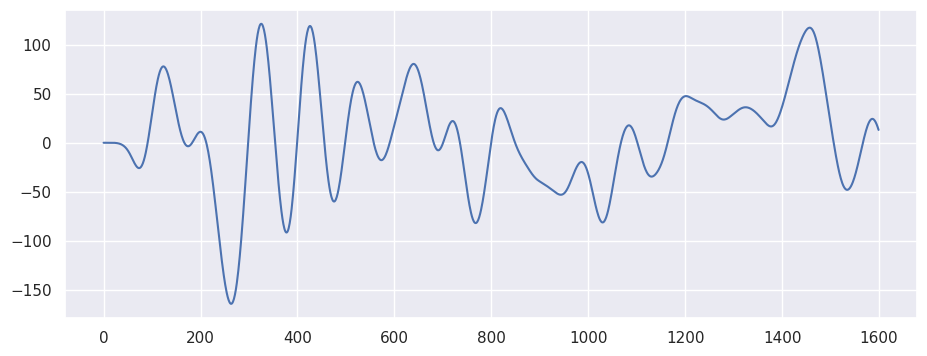

In [72]:
# 파라미터 계수 N
order = 5
#cutoff Wn
cutoff = [0.05,0.5]
fs = 52
ts = 1/ fs
Nyq = fs / 2
length = len(s1_balance)
sos = signal.butter(order, cutoff,btype='bandpass', output = 'sos', fs = fs)

s4_filtered = signal.sosfilt(sos, s4_balance)
plt.plot(s4_filtered)
# plt.plot(s4_filtered, linewidth=0.4)

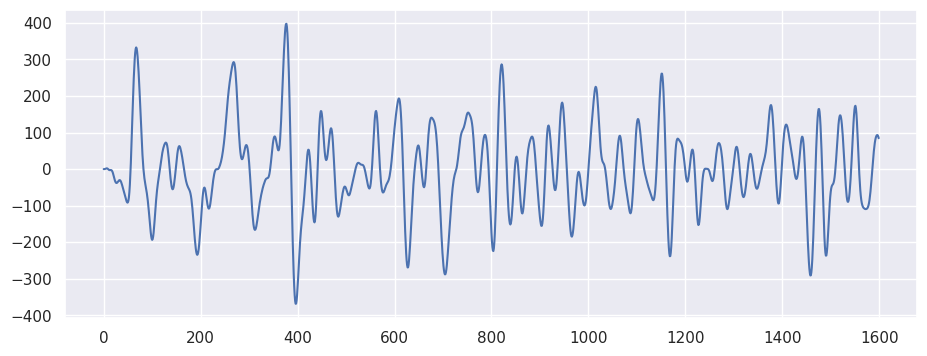

In [73]:
# 파라미터 계수 N
order = 5
#cutoff Wn
cutoff = [0.1,2]
fs = 52
ts = 1/ fs
Nyq = fs / 2
length = len(s1_balance)
sos = signal.butter(order, cutoff,btype='bandpass', output = 'sos', fs = fs)

s4_filtered = signal.sosfilt(sos, s4_balance)
plt.plot(s4_filtered)
# plt.plot(s4_filtered, linewidth=0.4)

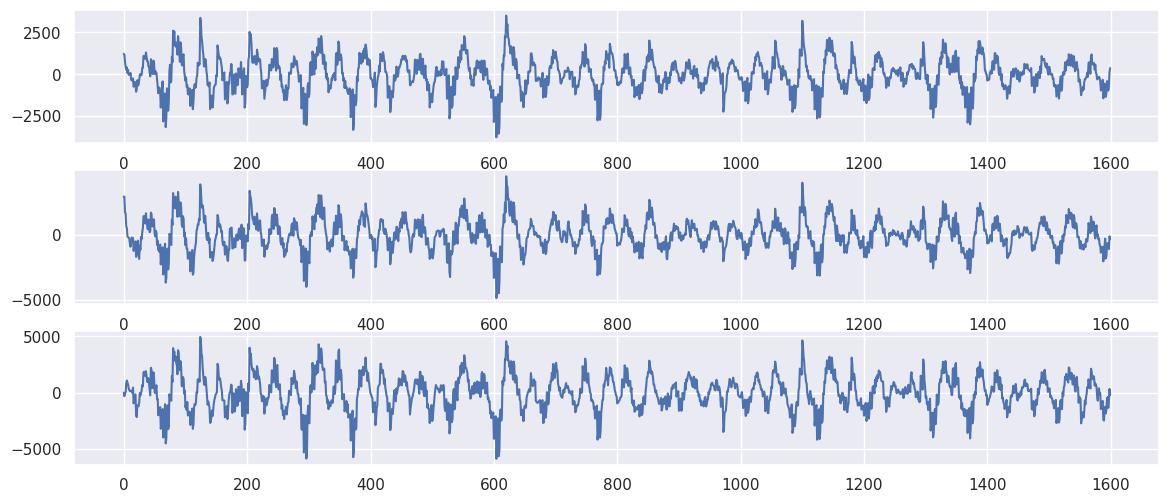

In [90]:
# 파라미터 계수 N
order = 2
#cutoff Wn
fs = 52
cutoff = [fs*0.03,fs/2*0.97]
ts = 1/ fs
Nyq = fs / 2

sos = signal.butter(order, cutoff,btype='bandpass', output = 'sos', fs = fs)

s1_filtered = signal.sosfilt(sos, s1_balance)
s2_filtered = signal.sosfilt(sos, s2_balance)
s3_filtered = signal.sosfilt(sos, s3_balance)

plt.figure(figsize=(14,8))

plt.subplot(4, 1, 1)
plt.plot(s1_filtered)

plt.subplot(4, 1, 2)
plt.plot(s2_filtered)

plt.subplot(4, 1, 3)
plt.plot(s3_filtered)

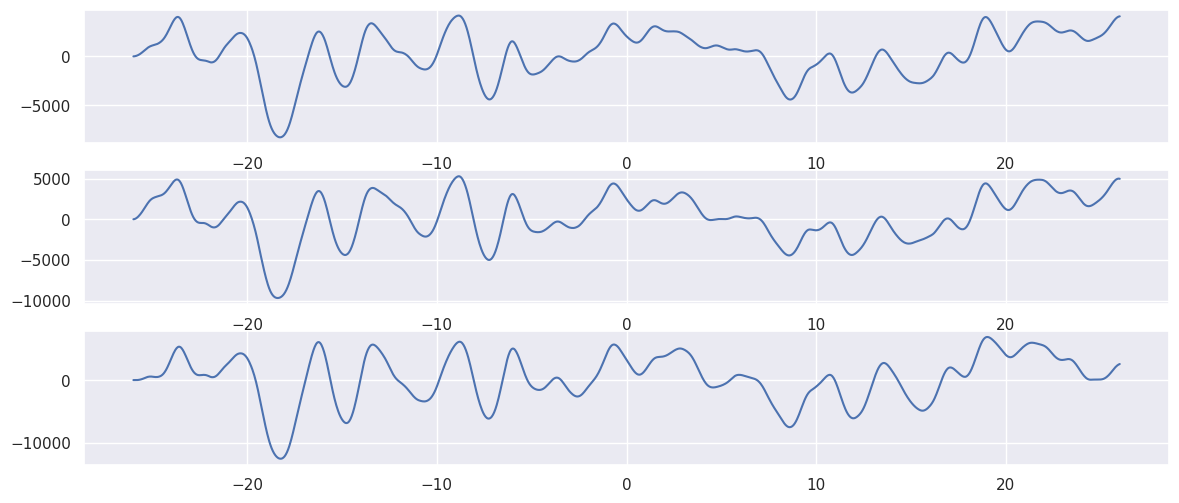

In [75]:
# 파라미터 계수 N
order = 2
#cutoff Wn
fs = 52
cutoff = [0.05,0.5]
ts = 1/ fs
Nyq = fs / 2

sos = signal.butter(order, cutoff,btype='bandpass', output = 'sos', fs = fs)

s1_filtered = signal.sosfilt(sos, s1_balance)
s2_filtered = signal.sosfilt(sos, s2_balance)
s3_filtered = signal.sosfilt(sos, s3_balance)

plt.figure(figsize=(14,8))

plt.subplot(4, 1, 1)
plt.plot(f, s1_filtered)

plt.subplot(4, 1, 2)
plt.plot(f, s2_filtered)

plt.subplot(4, 1, 3)
plt.plot(f, s3_filtered)

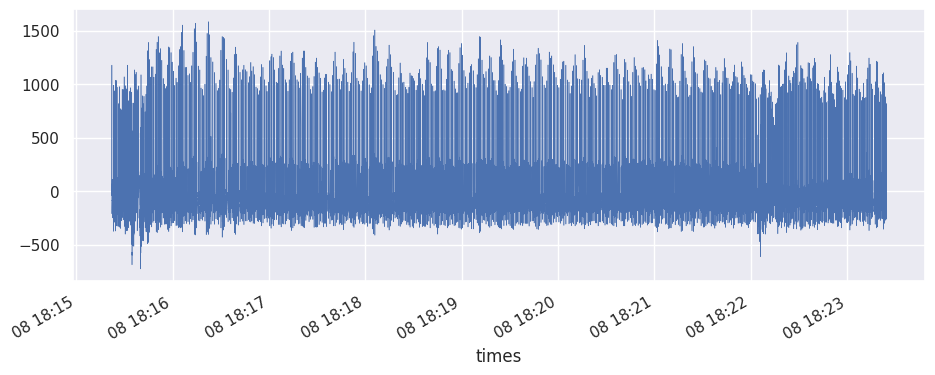

In [76]:
mplot = resting_h10['sensor'].plot(linewidth = 0.4)
# mplot = resting_h10[resting_h10['sensor'] >= 300]['sensor'].plot(linewidth = 0.4)
# mplot = resting_h10[resting_h10['sensor'] < 300]['sensor'].plot(linewidth = 0.4)

# mplot = resting_h10[resting_h10['sensor'] >= 300]['sensor'][10000:13000].plot(linewidth = 1)
# mplot = resting_h10[resting_h10['sensor']< 300]['sensor'][10000:13000].plot(linewidth = 1)
# mplot = resting_h10[resting_h10['sensor']< 100]['sensor'][10000:13000].plot(linewidth = 1)

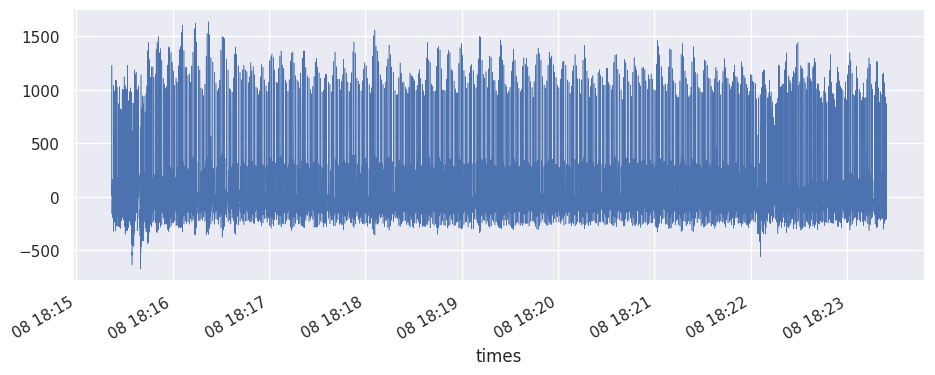

In [77]:
h_mean = resting_h10['sensor'].mean()

h_balance = resting_h10['sensor']-h_mean
mplot = h_balance.plot(linewidth = 0.4)

<StemContainer object of 3 artists>

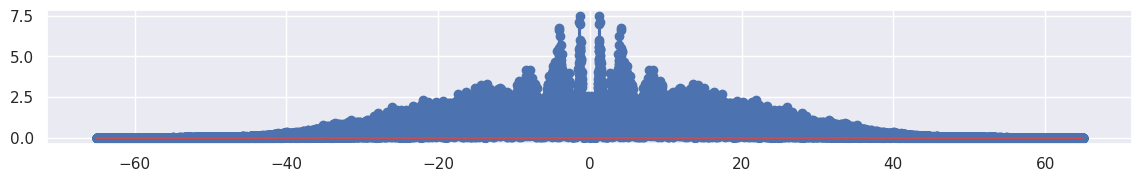

In [78]:
fs = 130
#0
ts = 1/ fs
Nyq = fs / 2
length = len(h_balance)

f = np.linspace(-(fs / 2), fs / 2, length)

h10_fft = np.fft.fft(h_balance)/len(h_balance)

h10_fft_m = abs(h10_fft)

plt.figure(figsize=(14,8))

plt.subplot(4, 1, 1)
plt.stem(f, np.fft.fftshift(h10_fft_m))


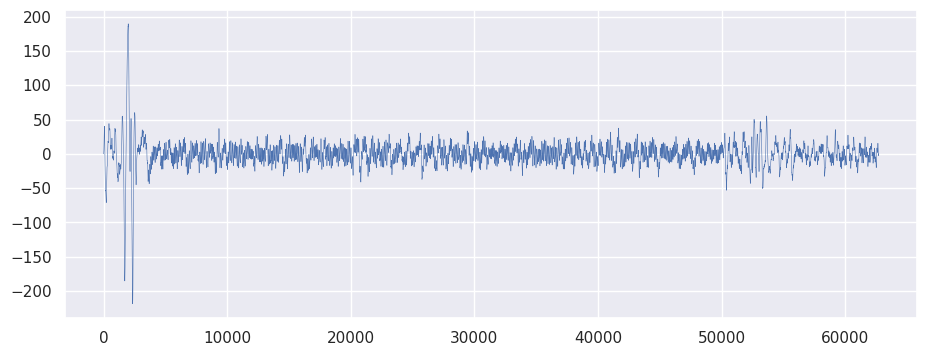

In [79]:
# 파라미터 계수 N
order = 2
#cutoff Wn
cutoff = [0.1,0.5]
sos = signal.butter(order, cutoff,btype='bandpass', output = 'sos', fs = fs)
h10_filtered = signal.sosfilt(sos, h_balance)
# plt.plot(h10_filtered)
plt.plot(h10_filtered, linewidth=0.4)

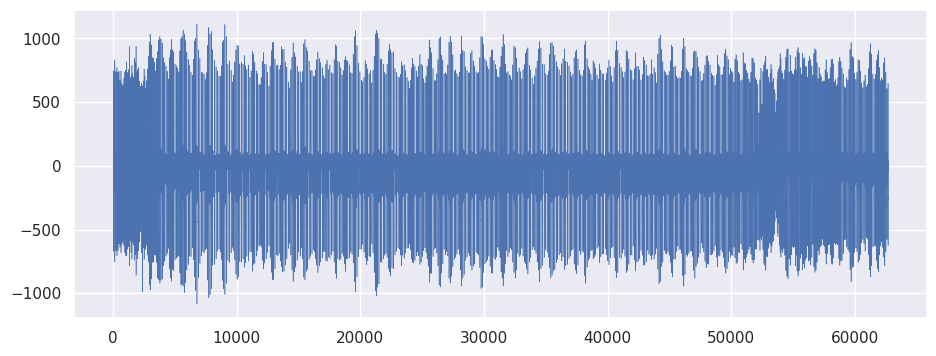

In [80]:
# 파라미터 계수 N
order = 2
#cutoff Wn
cutoff = [fs*0.03,fs/2*0.97]
fs = 130
ts = 1/ fs
Nyq = fs / 2
length = len(h_balance)
sos = signal.butter(order, cutoff,btype='bandpass', output = 'sos', fs = fs)

h10_filtered = signal.sosfilt(sos, h_balance)
# plt.plot(h10_filtered)
plt.plot(h10_filtered, linewidth=0.4)

<Axes: xlabel='times'>

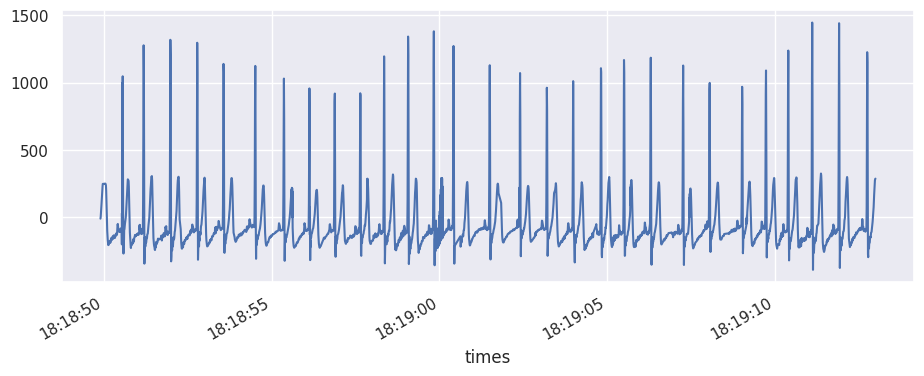

In [81]:
resting_h10['sensor'][27000:30000].plot()

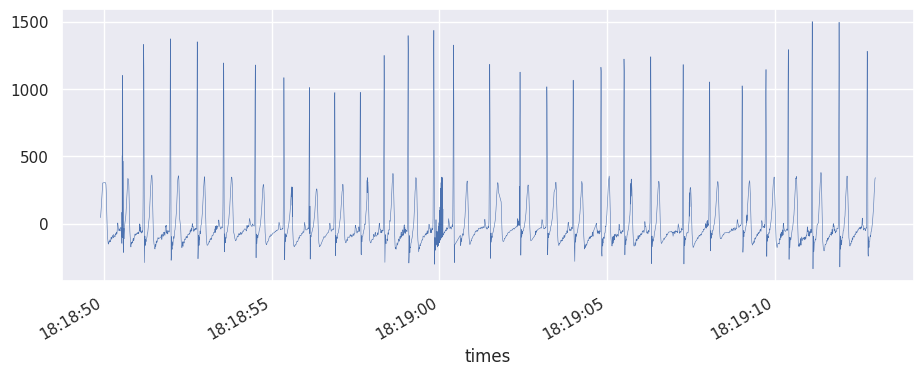

In [82]:
h_mean_sub = resting_h10['sensor'][27000:30000].mean()

h_balance_sub = resting_h10['sensor'][27000:30000]-h_mean
mplot = h_balance_sub.plot(linewidth = 0.4)

<StemContainer object of 3 artists>

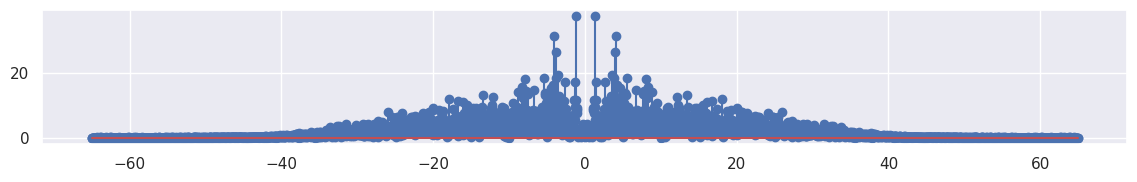

In [83]:
fs = 130
ts = 1/ fs
Nyq = fs / 2
length = len(h_balance_sub)

f = np.linspace(-(fs / 2), fs / 2, length)

h10_fft_sub = np.fft.fft(h_balance_sub)/len(h_balance_sub)

h10_fft_m_sub = abs(h10_fft_sub)

plt.figure(figsize=(14,8))

plt.subplot(4, 1, 1)
plt.stem(f, np.fft.fftshift(h10_fft_m_sub))

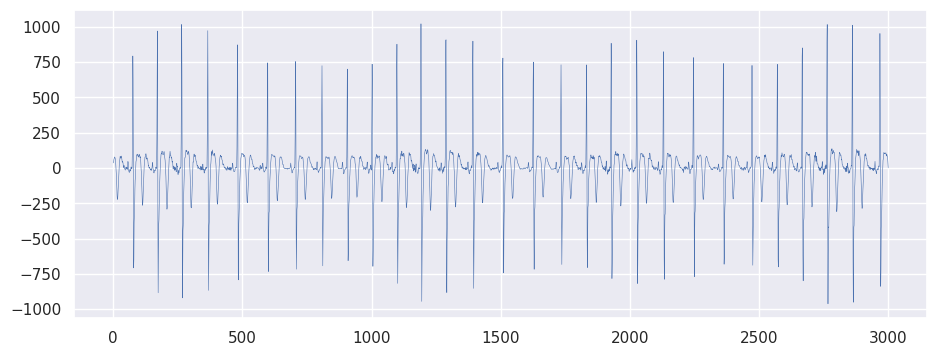

In [84]:
# 파라미터 계수 N
order = 2
#cutoff Wn
cutoff = [fs*0.03,fs/2*0.97]
fs = 130
ts = 1/ fs
Nyq = fs / 2
length = len(h_balance_sub)
sos = signal.butter(order, cutoff,btype='bandpass', output = 'sos', fs = fs)

h10_filtered_sub = signal.sosfilt(sos, h_balance_sub)
# plt.plot(h10_filtered)
plt.plot(h10_filtered_sub, linewidth=0.4)

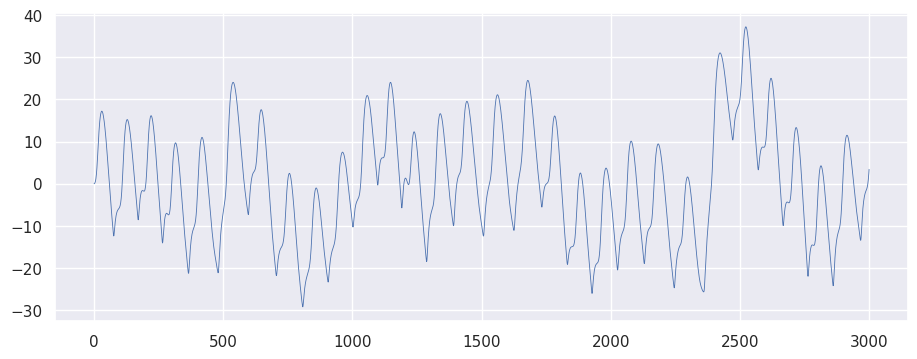

In [89]:
# 파라미터 계수 N
order = 2
#cutoff Wn
cutoff = [0.05,0.5]
fs = 130
#0.007692
ts = 1/ fs
Nyq = fs / 2
length = len(h_balance_sub)
sos = signal.butter(order, cutoff, btype='bandpass', output = 'sos', fs = fs)

h10_filtered_sub = signal.sosfilt(sos, h_balance_sub)
# plt.plot(h10_filtered)
plt.plot(h10_filtered_sub, linewidth=0.6)

In [267]:
# polar h10 ECG time domain features
time_domain = {
    #정상 범위 350~1500
    'mean_nni': 0,
    # 분포에서 20% 이상 날때 abnomal 판단(20%의 기준이 애매 재확인 필요)
    'sdnn': 0,
    #sd of diffrences between adjacent NN intervals
    'sdsd': 0,
    'nni_50': 0,
    'pnni_50': 0,
    'rmssd': 0,
    'median_nni': 0,
    'range_nni': 0,
    'cvsd': 0,
    'cvnni': 0,
    # 60초 내 횟수
    'mean_hr': 90,
    'max_hr': 140,
    'min_hr': 60,
    'std_hr': 15
}
# polar h10 ECG Frequency domain features
h10_param = ['RR', 'HRV_score', 'RMSSD', 'SDNN', 'pNN50', 'LF', 'HF', 'LF/HF')
# polar h10 ECG nonlinear domain features

SyntaxError: unterminated string literal (detected at line 8) (507047739.py, line 8)

In [ ]:
스트레스 지수 계산식


